In [4]:
#from sklearn import cross_validation, datasets, linear_model, metrics
from sklearn import model_selection, datasets, linear_model, metrics

import pylab
import numpy as np

In [3]:
# Генерация данных
blobs = datasets.make_blobs(300, centers=2, cluster_std=6,random_state=123)

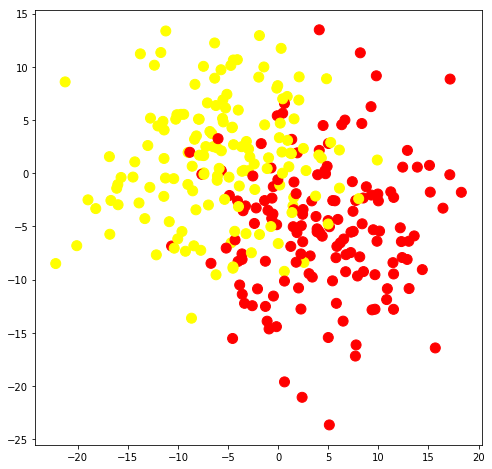

In [9]:
pylab.figure(figsize=(8,8))
pylab.scatter(map(lambda x: x[0], blobs[0]), map(lambda x: x[1], blobs[0]), c = blobs[1], cmap = 'autumn', s =100)

In [19]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0],blobs[1],
                                                                                     test_size = 15,
                                                                                    random_state=123)

In [27]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data,train_labels)
metric = metrics.roc_auc_score(test_labels,ridge_model.predict(test_data))
metric

0.9230769230769231

In [31]:
sgd_model = linear_model.SGDClassifier(max_iter=1000)
sgd_model.fit(train_data,train_labels)
metric = metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))
metric

0.8846153846153846

In [34]:
# Оценка среднего
ridge_auc_scores = model_selection.cross_val_score(ridge_model, blobs[0], blobs[1], scoring='roc_auc', cv=20)

In [35]:
sgd_auc_scores = model_selection.cross_val_score(sgd_model, blobs[0], blobs[1], scoring='roc_auc', cv=20)

In [50]:
ridgeMean = np.mean(ridge_auc_scores)
ridgeMean

0.9219866071428571

In [51]:
sgdMean = np.mean(sgd_auc_scores)
sgdMean

0.8951530612244898

In [44]:
np.std(ridge_auc_scores,ddof=0) #стандартное отклонение от среднего

0.06641916079750834

In [43]:
np.std(sgd_auc_scores,ddof=0) #стандартное отклонение от среднего

0.10507557722674937

In [45]:
########

In [46]:
# Интервальная оценка - в каких диапазонах среднее изменияется

In [47]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [54]:
sgd_mean_std = sgd_auc_scores.std(ddof=1)/(len(sgd_auc_scores)**0.5)
ridge_mean_std = ridge_auc_scores.std(ddof=1)/(len(ridge_auc_scores)**0.5)

In [56]:
print "sgd model mean auc 95%% confidence interval", _tconfint_generic(sgdMean, sgd_mean_std,
                                                                       len(sgd_auc_scores) - 1,
                                                                       0.05, 'two-sided')

print "ridge model mean auc 95%% confidence interval", _tconfint_generic(ridgeMean, ridge_mean_std,
                                                                         len(sgd_auc_scores) - 1,
                                                                         0.05, 'two-sided')

 sgd model mean auc 95%% confidence interval (0.8446986429149483, 0.9456074795340312)
ridge model mean auc 95%% confidence interval (0.8900939427284181, 0.953879271557296)
